In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from data_gen import *
from drawer import *
%matplotlib inline

In [3]:
seed=0

In [20]:
def PLA(data,w_init, max_iter,if_draw=False):
    w = w_init
    X=data[0]
    y=data[1]
    X=np.hstack((np.ones((X.shape[0],1)),X))

    for i in range(max_iter):
        h = np.sign(X @ w)
        mistake_indices = np.where(h != y)[0]
        if len(mistake_indices):
            j = np.random.choice(mistake_indices)
            w = w + y[j]*X[j,:]
            if if_draw:
                draw(data,w)
                plt.title('after '+str(i)+' iterations')
                print(w)
        else:
            break
    
        
    print('PLA Training Accuracy:',str((X.shape[0]-len(mistake_indices))/X.shape[0]))
    return w
        

In [21]:
def Pocket(data,w_init,max_iter,if_draw=False):
    w = w_init
    X = data[0]
    y = data[1]
    X = np.hstack((np.ones((X.shape[0],1)),X))

    for  i in range(max_iter):
        h = np.sign(X@w)
        mistake_indices = np.where(h!=y)[0]
        mistake_num = len(mistake_indices)
        if mistake_num>0:
            np.random.shuffle(mistake_indices)
            j = np.random.choice(mistake_indices)
            w_ = w + y[j]*X[j,:]
            h_ = np.sign(X@w_)
            mistake_indices_=np.where(h_!=y)[0]
            mistake_num_ = len(mistake_indices_)
            # print('after '+str(i)+' iterations',end='')
            # print(w.round(3))
            if mistake_num_ <= mistake_num:
                w = w_
                if if_draw:
                    draw(data,w)
                    plt.title('after '+str(i)+' iterations')
        else:
            break
        
    print('Pocket Training Accuracy:',str((X.shape[0]-len(mistake_indices))/X.shape[0]))
    return w

In [29]:
def validate(data,w):
    X=data[0]
    y=data[1]
    X = np.hstack((np.ones((X.shape[0],1)),X))#IMPORTANT!!!

    h=np.sign(X@w)
    mistake_indices = np.where(h!=y)[0]
    return (X.shape[0]-len(mistake_indices))/X.shape[0]

[-0.995 -2.091 -0.207]
Pocket Accuracy: 0.6
[ 1.005 -1.691  0.493]


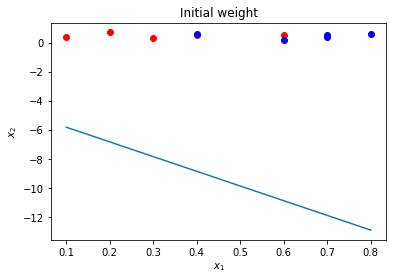

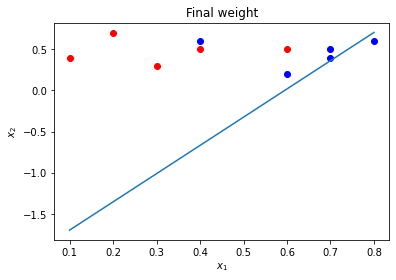

In [16]:
data = []
data.append(np.array([[0.2,0.7],[0.3,0.3],[0.4,0.5],[0.6,0.5],[0.1,0.4],[0.4,0.6],[0.6,0.2],[0.7,0.4],[0.8,0.6],[0.7,0.5]]))
data.append(np.array([1,1,1,1,1,-1,-1,-1,-1,-1]))
w_init = np.random.randn(3)
print(w_init.round(3))
draw(data,w_init)
plt.title('Initial weight')

w = Pocket(data,w_init,20)
draw(data,w)
plt.title('Final weight')
print(w.round(3))

PLA Training Accuracy: 1.0
Wall time: 4 ms
PLA Validation Accuracy 1.0
Pocket Training Accuracy: 1.0
Wall time: 950 µs
Pocket Validation Accuracy 1.0


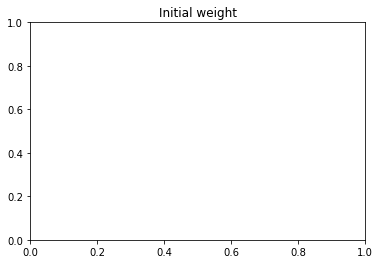

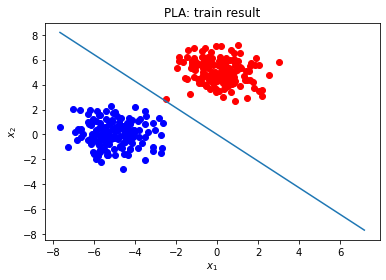

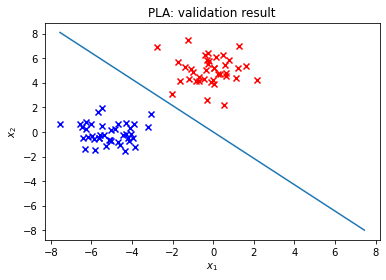

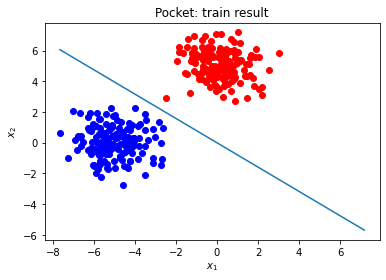

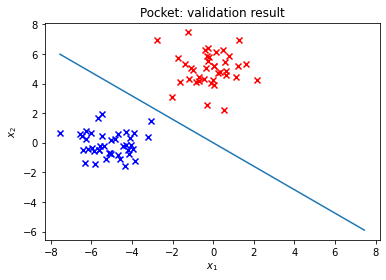

In [35]:
data = data_generator([-5,0],np.identity(2),[0,5],np.identity(2),400,seed=seed)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=seed)
train_data=(X_train,y_train)
test_data=(X_test,y_test)
w_init = np.zeros(3)
draw(data,w_init)
plt.title('Initial weight')

%time w_pla = PLA(train_data,w_init,100)
draw(train_data,w_pla,'o')
plt.title('PLA: train result')

draw(test_data,w_pla,'x')
plt.title('PLA: validation result')
print('PLA Validation Accuracy '+str(validate(test_data,w_pla)))

%time w_pocket = Pocket(train_data,w_init,100)
draw(train_data,w_pocket,'o')
plt.title('Pocket: train result')

draw(test_data,w_pocket,'x')
plt.title('Pocket: validation result')
print('Pocket Validation Accuracy '+str(validate(test_data,w_pocket)))


从上面的结果我们可以看出: 
- PLA
  - 在training set上的正确率为100%
  - 在validation set上的正确率为100%
  - 运行时间为4ms
- Pocket
  - 在training set上的正确率为100%
  - 在validation set上的正确率为100%
  - 运行时间为950us

可见Pocket算法的速度远快于PLA算法

PLA Training Accuracy: 0.60625
Wall time: 8.97 ms
PLA Validation Accuracy 0.775
Pocket Training Accuracy: 0.75
Wall time: 12 ms
Pocket Validation Accuracy 0.8125


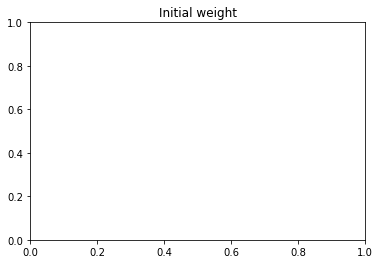

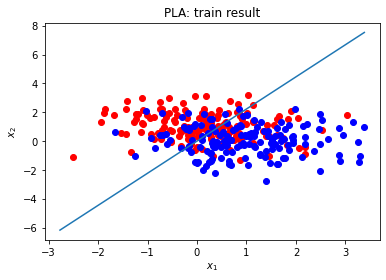

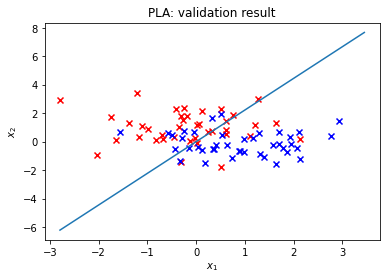

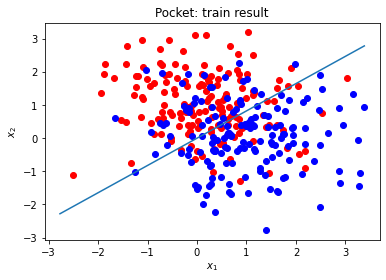

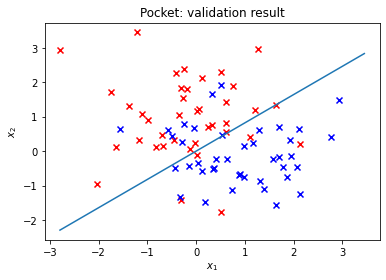

In [36]:
data = data_generator([1,0],np.identity(2),[0,1],np.identity(2),400,seed=seed)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=seed)
train_data=(X_train,y_train)
test_data=(X_test,y_test)
w_init = np.zeros(3)
draw(data,w_init)
plt.title('Initial weight')

%time w_pla = PLA(train_data,w_init,100)
draw(train_data,w_pla,'o')
plt.title('PLA: train result')

draw(test_data,w_pla,'x')
plt.title('PLA: validation result')
print('PLA Validation Accuracy '+str(validate(test_data,w_pla)))

%time w_pocket = Pocket(train_data,w_init,100)
draw(train_data,w_pocket,'o')
plt.title('Pocket: train result')

draw(test_data,w_pocket,'x')
plt.title('Pocket: validation result')
print('Pocket Validation Accuracy '+str(validate(test_data,w_pocket)))


从上面的结果我们可以看出: 
- PLA
  - 在training set上的正确率为60.625%
  - 在validation set上的正确率为77.5%
  - 运行时间为8.97ms
- Pocket
  - 在training set上的正确率为75%
  - 在validation set上的正确率为81.25%
  - 运行时间为12ms

推测是因为样本线性不可分, 所以两种算法都一直迭代到所设置的最大迭代次数才停止, 而Pocket在每次迭代中要计算两次, PLA只用计算一次, 所以Pocket算法所花时间更短一点

## 下面为测试实验
### 实验一: 改变初始化方式, 把零初始化变为随机初始化

PLA Training Accuracy: 0.621875
Wall time: 11.9 ms
PLA Validation Accuracy 0.7625
Pocket Training Accuracy: 0.759375
Wall time: 11.9 ms
Pocket Validation Accuracy 0.825


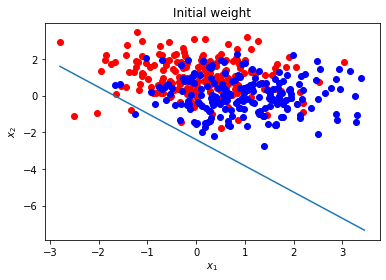

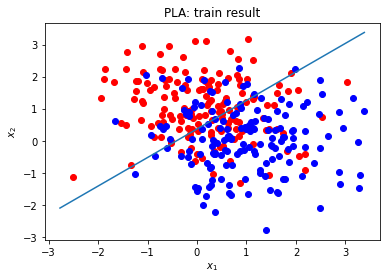

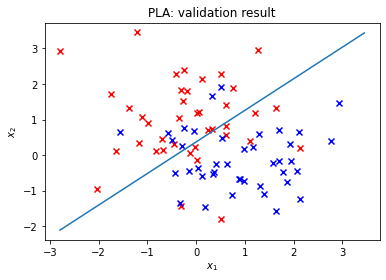

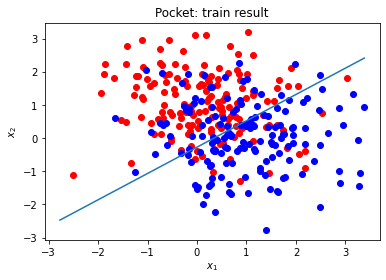

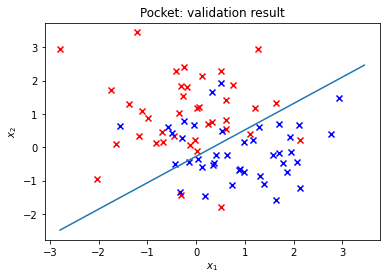

In [38]:
data = data_generator([1,0],np.identity(2),[0,1],np.identity(2),400,seed=seed)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=seed)
train_data=(X_train,y_train)
test_data=(X_test,y_test)
w_init = np.random.randn(3)
draw(data,w_init)
plt.title('Initial weight')

%time w_pla = PLA(train_data,w_init,100)
draw(train_data,w_pla,'o')
plt.title('PLA: train result')

draw(test_data,w_pla,'x')
plt.title('PLA: validation result')
print('PLA Validation Accuracy '+str(validate(test_data,w_pla)))

%time w_pocket = Pocket(train_data,w_init,100)
draw(train_data,w_pocket,'o')
plt.title('Pocket: train result')

draw(test_data,w_pocket,'x')
plt.title('Pocket: validation result')
print('Pocket Validation Accuracy '+str(validate(test_data,w_pocket)))


可见初始化方式对结果并无显著性影响

### 实验二: 尝试增加迭代次数

PLA Training Accuracy: 0.60625
Wall time: 141 ms
PLA Validation Accuracy 0.4375
Pocket Training Accuracy: 0.71875
Wall time: 158 ms
Pocket Validation Accuracy 0.775


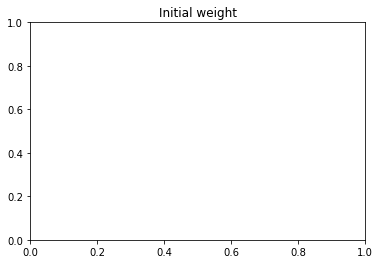

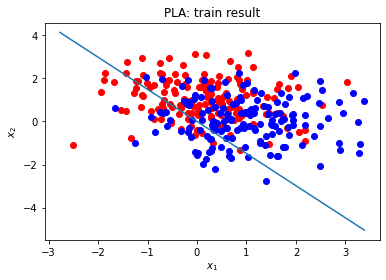

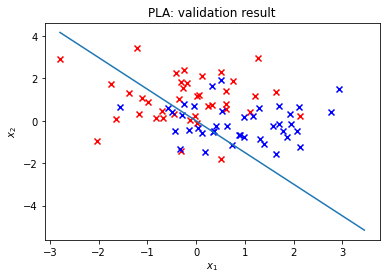

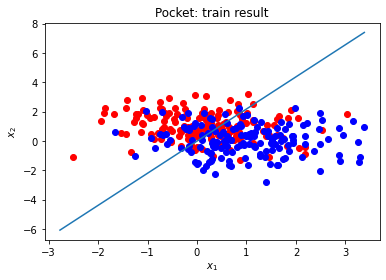

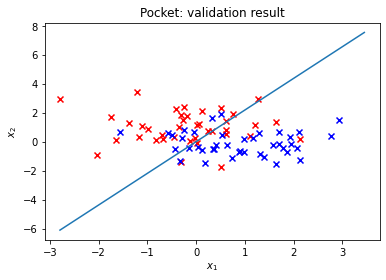

In [39]:
data = data_generator([1,0],np.identity(2),[0,1],np.identity(2),400,seed=seed)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=seed)
train_data=(X_train,y_train)
test_data=(X_test,y_test)
w_init = np.zeros(3)
draw(data,w_init)
plt.title('Initial weight')

%time w_pla = PLA(train_data,w_init,1000)
draw(train_data,w_pla,'o')
plt.title('PLA: train result')

draw(test_data,w_pla,'x')
plt.title('PLA: validation result')
print('PLA Validation Accuracy '+str(validate(test_data,w_pla)))

%time w_pocket = Pocket(train_data,w_init,1000)
draw(train_data,w_pocket,'o')
plt.title('Pocket: train result')

draw(test_data,w_pocket,'x')
plt.title('Pocket: validation result')
print('Pocket Validation Accuracy '+str(validate(test_data,w_pocket)))


可见对于线性不可分的情形, 增加迭代次数可能反而会造成模型发生较为严重的过拟合现象
### 实验三: 尝试改变数据分布

PLA Training Accuracy: 0.98125
Wall time: 6.94 ms
PLA Validation Accuracy 0.975
Pocket Training Accuracy: 0.9875
Wall time: 9.92 ms
Pocket Validation Accuracy 0.975


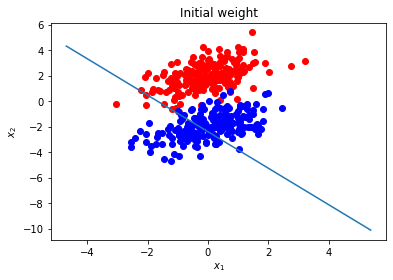

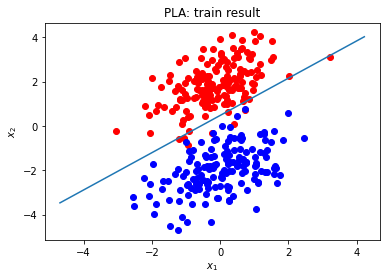

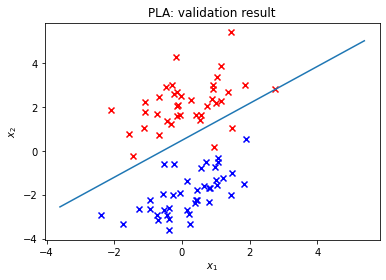

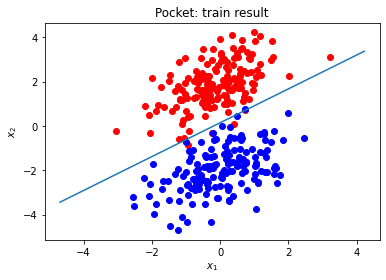

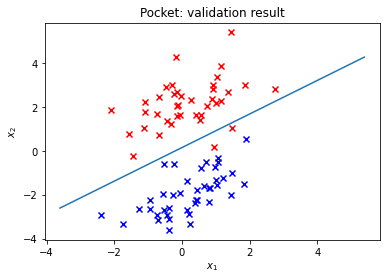

In [43]:
data = data_generator([0,-2],[[1,0.5],[0.5,1]],[0,2],[[1,0.5],[0.5,1]],400,seed=seed)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=seed)
train_data=(X_train,y_train)
test_data=(X_test,y_test)
w_init = np.random.randn(3)
draw(data,w_init)
plt.title('Initial weight')

%time w_pla = PLA(train_data,w_init,100)
draw(train_data,w_pla,'o')
plt.title('PLA: train result')

draw(test_data,w_pla,'x')
plt.title('PLA: validation result')
print('PLA Validation Accuracy '+str(validate(test_data,w_pla)))

%time w_pocket = Pocket(train_data,w_init,100)
draw(train_data,w_pocket,'o')
plt.title('Pocket: train result')

draw(test_data,w_pocket,'x')
plt.title('Pocket: validation result')
print('Pocket Validation Accuracy '+str(validate(test_data,w_pocket)))


可见当模型具有较好的线性可分性时, 两种模型都能够具有较好的效果